In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# adjust 한글 font
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

# **Part 2. Tensorflow를 이용한 다층신경망 구현**
- 딥러닝에 필요한 수학?
    1. Linear Algebra
    2. Calculus (Derivatives)
    3. Probability & Statistics

# Chapter 1. Linear Regression
- 예측한 값을 return
- 데이터 분포를 잘 대변하는 직선은?

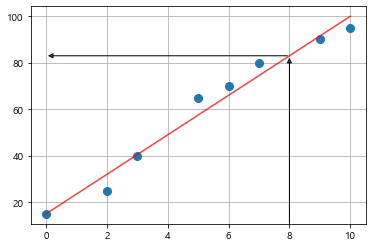

In [2]:
x = np.array([0, 2, 3, 5, 6, 7, 9, 10])
y = np.array([15, 25, 40, 65, 70, 80, 90, 95])
y_hat = 8.5 * x + 15
plt.plot(x, y, ls='none', marker='o', ms=8)
plt.plot(x, y_hat, color='r', alpha=.75)
plt.annotate('', xy=(8, 8.5*8+15), xytext=(8, 10),
            arrowprops={'arrowstyle':"-|>"})
plt.annotate('', xy=(0, 8.5*8+15), xytext=(8, 8.5*8+15),
            arrowprops={'arrowstyle':"-|>"})
plt.grid(True)

## Hypothesis
- 어떤 가설이 좋은 가설일지 정량적으로 측정할 수 없을까?
$$\hat{y}=H(x)$$

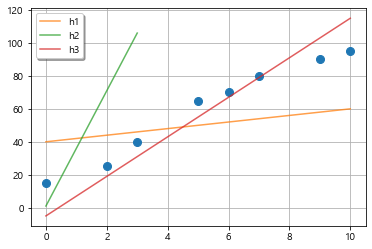

In [3]:
x = np.array([0, 2, 3, 5, 6, 7, 9, 10])
y = np.array([15, 25, 40, 65, 70, 80, 90, 95])
h1 = 2 * x + 40
h2 = 35 * x + 1
h3 = 12 * x - 5
plt.plot(x, y, ls='none', marker='o', ms=8)
plt.plot(x, h1, alpha=.75, label='h1')
plt.plot(x[:3], h2[:3], alpha=.75, label='h2')
plt.plot(x, h3, alpha=.75, label='h3')
plt.legend(shadow=True, fontsize=10)
plt.grid(True)

## 오차를 어떻게 계산하면 좋을까?
- 오차를 양수값으로!
- 실제 정답과 차이가 클수록 penalty (square!)
$$H(x)-y$$
$$\downarrow$$
$$abs(H(x)-y)$$
$$\downarrow$$
$$(H(x)-y)^2$$

## 비용 함수 (cost function)
- 어떤 가설이 실제 정답과 얼마나 차이가 나는지 알 수 있는 지표
- 아래는 $Mean\;Squared\;Error$
$$cost=\frac{1}{m}\sum_{i=1}^{m}{(H({x_i})-{y_i})^{2}}$$

## 목표? : cost를 최소화하는 가설(hypothesis)를 찾는 것!
$$cost=\frac{1}{m}\sum_{i=1}^{m}{(H({x_i})-{y_i})^{2}}\quad\leftarrow\quad{H({x_i})=W{x_i}+b}$$
$$\Downarrow$$
$$cost(W,b)=\frac{1}{m}\sum_{i=1}^{m}{(Wx_i+b-{y_i})^{2}}\quad{where\;W:weight,\;b:bias}$$

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


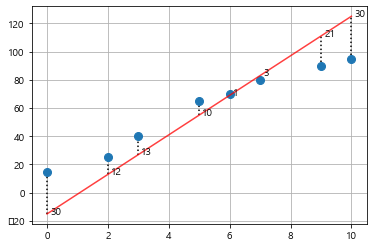

Calc Errors : 
	H(x) - y     = [-30 -12 -13 -10  -1   3  21  30]
	|H(x) - y|   = [30 12 13 10  1  3 21 30]
	(H(x) - y)^2 = [900 144 169 100   1   9 441 900]
Cost Function : 
	MSE = 333.0


In [4]:
x = np.array([0, 2, 3, 5, 6, 7, 9, 10])
y = np.array([15, 25, 40, 65, 70, 80, 90, 95])
y_hat = 14 * x - 15
plt.plot(x, y, ls='none', marker='o', ms=8)
for i in range(len(x)):
    plt.vlines(x[i], ymin=min(y[i], y_hat[i]), 
                     ymax=max(y[i], y_hat[i]),
                     ls=':')
    plt.annotate(abs(y[i]-y_hat[i]), 
                 (x[i]+.1, y_hat[i]), 
                 color='k', fontsize=10)
plt.plot(x, y_hat, color='r', alpha=.75)
plt.grid(True)
plt.show()
print('Calc Errors : ')
print('\tH(x) - y     = {}'.format(y_hat - y))
print('\t|H(x) - y|   = {}'.format(abs(y_hat - y)))
print('\t(H(x) - y)^2 = {}'.format((y_hat - y)**2))
print('Cost Function : ')
print('\tMSE = {}'.format((1/len(x))*sum((y_hat-y)**2)))

## 비용 함수의 볼록(convex) 성질
- 전역 최저점이 보장됨!

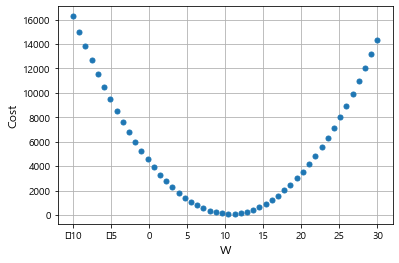

In [5]:
def cost(x, y, W, b):
    m = len(x)
    return (1 / m) * (sum((W * x + b - y)**2))

b = 0 # bias = 0
ws = np.linspace(-10, 30, 50)
costs = np.array([cost(x, y, w, 0) for w in ws])
plt.plot(ws, costs, 
         marker='o', ms=5, ls='none')
plt.xlabel('W', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.grid(True)
plt.show()

## Gradient Descent (경사하강법)
- 경사하강법은 cost를 최소화시키는 Weight를 기울기가 낮은 곳을 계속해서 찾아가는 식으로 찾아가는 방법
- 기울기를 계산하려면? 미분!
- MSE를 미분했을 때 나오는 상수 2를 size down하기 위해 cost function을 미리 2로 나눠주자!
$$cost(W)=\frac{1}{m}\sum_{i=1}^{m}{(Wx_i-{y_i})^{2}}$$
$$\Downarrow\text{(divide 2)}$$
$$cost(W)=\frac{1}{2m}\sum_{i=1}^{m}{(Wx_i-{y_i})^{2}}$$
- 흔히 산을 가장 빠르게 내려가는 방법으로 묘사를 함

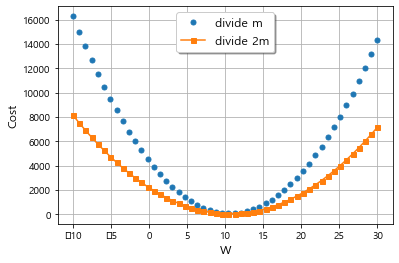

In [6]:
def cost(x, y, W, b):
    m = len(x)
    return (1 / m) * (sum((W * x + b - y)**2))

def cost2(x, y, W, b):
    m = len(x)
    return (1 / (2 * m)) * (sum((W * x + b - y)**2))

b = 0 # bias = 0
ws = np.linspace(-10, 30, 50)
costs = np.array([cost(x, y, w, 0) for w in ws])
costs2 = np.array([cost2(x, y, w, 0) for w in ws])
plt.plot(ws, costs, label='divide m',
         marker='o', ms=5, ls='none')
plt.plot(ws, costs2, label='divide 2m',
         marker='s', ms=5, ls='-')
plt.xlabel('W', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.legend(shadow=True, fontsize=12)
plt.grid(True)
plt.show()

## Gradient Descent
$$cost(W)=\frac{1}{2m}\sum_{i=1}^{m}{(Wx_i-{y_i})^{2}}$$
- W값을 경사 하강법으로 갱신!
$$W:=W-\frac{\partial}{\partial W}cost(W)$$
- Learning Rate(학습율)
    - 학습하는 속도를 조절하는 HyperParameter
    - learning rate가 크면 값이 수렴하지 않고 발산
    - learning rate가 작으면 수렴하는데 시간이 오래걸림
$$W:=W-\alpha\frac{\partial}{\partial W}cost(W),\quad where\;\alpha :learning\,rate$$
- 위 식을 적용하고 MSE의 편미분을 계산하여 최종적인 update 식을 계산
$$\frac{\partial}{\partial W}cost(W)=\frac{1}{2m}\sum_{i=1}^{m}{2(Wx_i-{y_i})x_i}$$
$$\Downarrow$$
$$W:=W-\alpha\frac{1}{m}\sum_{i=1}^{m}{(Wx_i-{y_i})x_i}$$

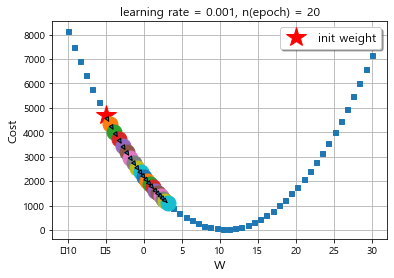

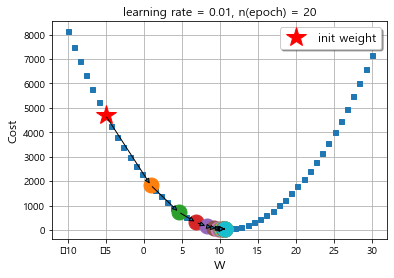

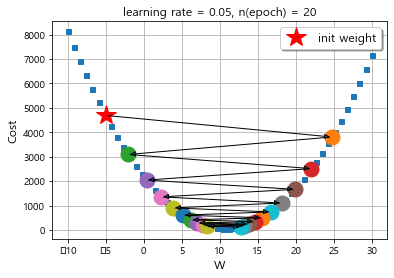

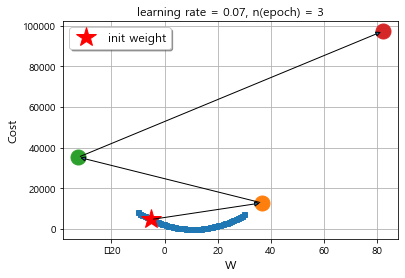

In [7]:
# Bivariate

def calc_cost(x, y, W, b):
    m = len(x)
    return (1 / (2 * m)) * (sum((W * x + b - y)**2))

def update_weight(x, y, w, learning_rate):
    cons = learning_rate / len(x)
    express = sum((w * x - y) * x)
    return w - cons * express

def gradient_descent(x, y, learning_rate=.1, epochs=10, 
                     ws=None, init_weight=None, b=0,
                     early_stopping=5):
    """bias 고려 안하고 코드 짬"""
    # basic plot ---------------------------
    if ws == None:
        ws = np.linspace(-10, 30, 50)
    costs = np.array([calc_cost(x, y, w, b) for w in ws])
    plt.plot(ws, costs,
             marker='s', ms=5, ls='none')
    # gradient descent ---------------------
    if init_weight is not None:
        # 지정한 weight로 학습 시작
        w0 = init_weight
    else:
        # 랜덤하게 처음 point를 지정
        w0 = np.random.permutation(ws)[0] 
    # 최초로 설정된 weight plotting
    plt.plot(w0, calc_cost(x, y, w0, b), label='init weight',
            ls='none', marker='*', ms=20, color='r')
    min_cost, stop = 1e17, 0 # loop을 위한 기본 parameter 설정
    for epoch in range(epochs):
        cost = calc_cost(x, y, w0, b)
        w1 = update_weight(x, y, w0, learning_rate)
        cost1 = calc_cost(x, y, w1, b)
        # cost를 체크, 조기 종료 조건 설정
        if cost < min_cost:
            min_cost = cost
            stop += 1
            if stop >= early_stopping:
                break
        else:
            stop = 0
        # 학습 과정 시각화 -----------------
        plt.plot(w1, cost1, ls='none',
                marker='o', ms=15)  # 점 찍기
        plt.annotate('', xytext=(w0, cost), 
                     xy=(w1, cost1),
                     arrowprops={'arrowstyle':"-|>"})
        w0 = w1
    # else plot info. ----------------------
    plt.xlabel('W', fontsize=12)
    plt.ylabel('Cost', fontsize=12)
    plt.title('learning rate = {}, n(epoch) = {}'.format(
        learning_rate, epoch+1))
    plt.legend(shadow=True, fontsize=12)
    plt.grid(True)
    plt.show()
    
# 시각화 --------------------------------------------
gradient_descent(x, y, learning_rate=.001, epochs=100, init_weight=-5, early_stopping=20)
gradient_descent(x, y, learning_rate=.01, epochs=100, init_weight=-5, early_stopping=20)
gradient_descent(x, y, learning_rate=.05, epochs=100, init_weight=-5, early_stopping=20)
gradient_descent(x, y, learning_rate=.07, epochs=3, init_weight=-5, early_stopping=20)

## 특성(feature)이 여러 개인 경우?!
- 가설 H(x)만 약간 수정!
- weight를 업데이트할 때, 각 변수별 weight를 동시에 (**simultaneously**) 업데이트해야함!!!
$$cost(W)=\frac{1}{m}\sum_{i=1}^{m}\big(H(x_1,x_2,\dots,x_n)-y_i\big )^2$$
$$H(x_1,x_2,\dots,x_n)={w_1}{x_1}+{w_2}{x_2}+\dots+{w_n}{x_n}$$
$$\Downarrow$$

$$\begin{bmatrix}
x_1 & x_2 & \dots & x_n \\
\end{bmatrix}
\times
\begin{bmatrix}
w_1\\
w_2\\
\vdots\\
w_n\\
\end{bmatrix}=
\begin{bmatrix}
w_1x_1 + w_2x_2 + \dots + w_nx_n \\
\end{bmatrix}
$$
$$(m\times n)\;\times\;(n\times 1)=(m\times 1)$$
$$\Downarrow$$
$$H(X)=XW$$
$$where\;X=\begin{bmatrix}
x_1 & x_2 & \dots & x_n \\
\end{bmatrix},\;W=\begin{bmatrix}
w_1 & w_2 & \dots & w_n\\
\end{bmatrix}^{T}$$

## 구현

## Keras 실습
- 기존 코드를 TensorFlow 2.0으로 바꾸기
- https://www.tensorflow.org/beta/guide/migration_guide?hl=ko

In [8]:
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

x_train = np.array([1, 2, 3])
y_train = np.array([1, 2, 3])

model = Sequential()
model.add(Dense(1, input_dim=1))

sgd = SGD(lr=0.1)
model.compile(loss='mse', optimizer=sgd)

# prints summary of the model to the terminal
model.summary()

model.fit(x_train, y_train, epochs=200)

y_predict = model.predict(np.array([5]))
print(y_predict)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
3/3 [==============================] - 2s 689ms/sample - loss: 1.0505
Epoch 2/200
3/3 [==============================] - 0s 827us/sample - loss: 0.0167
Epoch 3/200
3/3 [==============================] - 0s 655us/sample - loss: 0.0041
Epoch 4/200
3/3 [==============================] - 0s 651us/sample - loss: 0.0038
Epoch 5/200
3/3 [==============================] - 0s 641us/sample - loss: 0.0036
Epoch 6/200
3/3 [==============================] - 0s 825us/sample - loss: 0.0034
Epoch 7/200
3/3 

Epoch 82/200
3/3 [==============================] - 0s 827us/sample - loss: 8.5154e-05
Epoch 83/200
3/3 [==============================] - 0s 661us/sample - loss: 8.1107e-05
Epoch 84/200
3/3 [==============================] - 0s 661us/sample - loss: 7.7255e-05
Epoch 85/200
3/3 [==============================] - 0s 661us/sample - loss: 7.3586e-05
Epoch 86/200
3/3 [==============================] - 0s 661us/sample - loss: 7.0089e-05
Epoch 87/200
3/3 [==============================] - 0s 661us/sample - loss: 6.6760e-05
Epoch 88/200
3/3 [==============================] - 0s 661us/sample - loss: 6.3590e-05
Epoch 89/200
3/3 [==============================] - 0s 661us/sample - loss: 6.0570e-05
Epoch 90/200
3/3 [==============================] - 0s 661us/sample - loss: 5.7693e-05
Epoch 91/200
3/3 [==============================] - 0s 661us/sample - loss: 5.4952e-05
Epoch 92/200
3/3 [==============================] - 0s 661us/sample - loss: 5.2341e-05
Epoch 93/200
3/3 [=========================

Epoch 176/200
3/3 [==============================] - 0s 827us/sample - loss: 8.7813e-07
Epoch 177/200
3/3 [==============================] - 0s 662us/sample - loss: 8.3634e-07
Epoch 178/200
3/3 [==============================] - 0s 992us/sample - loss: 7.9655e-07
Epoch 179/200
3/3 [==============================] - 0s 992us/sample - loss: 7.5865e-07
Epoch 180/200
3/3 [==============================] - 0s 827us/sample - loss: 7.2262e-07
Epoch 181/200
3/3 [==============================] - 0s 827us/sample - loss: 6.8832e-07
Epoch 182/200
3/3 [==============================] - 0s 992us/sample - loss: 6.5562e-07
Epoch 183/200
3/3 [==============================] - 0s 992us/sample - loss: 6.2442e-07
Epoch 184/200
3/3 [==============================] - 0s 992us/sample - loss: 5.9474e-07
Epoch 185/200
3/3 [==============================] - 0s 661us/sample - loss: 5.6658e-07
Epoch 186/200
3/3 [==============================] - 0s 661us/sample - loss: 5.3970e-07
Epoch 187/200
3/3 [=============

In [9]:
x_train = np.array(
    [[73, 80, 75],
     [93, 88, 93],
     [89, 91, 90],
     [96, 98, 100],
     [73, 66, 70]]
)
y_train = np.array([152, 185, 180, 196, 142])
print(x_train.shape, y_train.shape)

model = Sequential()
model.add(Dense(1, input_dim=3))

sgd = SGD(lr=0.00001)
model.compile(loss='mse', optimizer=sgd)

# prints summary of the model to the terminal
model.summary()

model.fit(x_train, y_train, epochs=200)

y_predict = model.predict(
    np.array([[74, 24, 33]])
)
print(y_predict)

(5, 3) (5,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
5/5 [==============================] - 0s 22ms/sample - loss: 171.0254
Epoch 2/200
5/5 [==============================] - 0s 496us/sample - loss: 56.6020
Epoch 3/200
5/5 [==============================] - 0s 397us/sample - loss: 20.7350
Epoch 4/200
5/5 [==============================] - 0s 403us/sample - loss: 9.4910
Epoch 5/200
5/5 [==============================] - 0s 397us/sample - loss: 5.9652
Epoch 6/200
5/5 [==============================] - 0s 396us/sample - loss: 4.8586
Epoch 7/200
5/5 [==============================] - 0s 496us/sample - loss: 4.5102
Epoch 8/200
5/5 [==============================] - 0s 396us/sample - loss: 4.3996
Epoch

Epoch 95/200
5/5 [==============================] - 0s 297us/sample - loss: 4.1667
Epoch 96/200
5/5 [==============================] - 0s 397us/sample - loss: 4.1646
Epoch 97/200
5/5 [==============================] - 0s 496us/sample - loss: 4.1625
Epoch 98/200
5/5 [==============================] - 0s 397us/sample - loss: 4.1605
Epoch 99/200
5/5 [==============================] - 0s 397us/sample - loss: 4.1584
Epoch 100/200
5/5 [==============================] - 0s 396us/sample - loss: 4.1564
Epoch 101/200
5/5 [==============================] - 0s 397us/sample - loss: 4.1543
Epoch 102/200
5/5 [==============================] - 0s 496us/sample - loss: 4.1523
Epoch 103/200
5/5 [==============================] - 0s 397us/sample - loss: 4.1502
Epoch 104/200
5/5 [==============================] - 0s 397us/sample - loss: 4.1482
Epoch 105/200
5/5 [==============================] - 0s 297us/sample - loss: 4.1461
Epoch 106/200
5/5 [==============================] - 0s 496us/sample - loss: 4.14

Epoch 193/200
5/5 [==============================] - 0s 496us/sample - loss: 3.9702
Epoch 194/200
5/5 [==============================] - 0s 396us/sample - loss: 3.9682
Epoch 195/200
5/5 [==============================] - 0s 496us/sample - loss: 3.9663
Epoch 196/200
5/5 [==============================] - 0s 397us/sample - loss: 3.9643
Epoch 197/200
5/5 [==============================] - 0s 397us/sample - loss: 3.9624
Epoch 198/200
5/5 [==============================] - 0s 396us/sample - loss: 3.9604
Epoch 199/200
5/5 [==============================] - 0s 397us/sample - loss: 3.9585
Epoch 200/200
5/5 [==============================] - 0s 297us/sample - loss: 3.9565
[[79.99494]]


In [10]:
np.expand_dims(np.arange(30).reshape(6, 5), axis=0)

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

# Chapter 2. Logistic Regression
- Solve Classification Problem

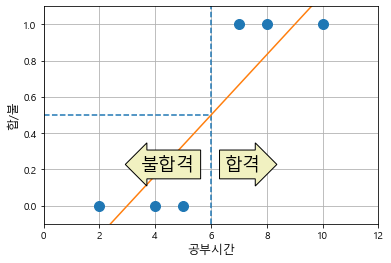

In [11]:
# 자격증 시험 결과
x = np.array([2, 4, 5, 7, 8, 10]) # 공부 시간
y = np.array([0, 0, 0, 1, 1, 1]) # 합격 / 불합격
plt.plot(x, y, marker='o', ls='none', ms=10)
plt.axvline(6, ls='--')
plt.axhline(.5, xmax=.5, ls='--')
plt.text(3.5, .2, '불합격', fontsize=18,
          bbox=dict(boxstyle='larrow', fc="#F1F1C1", ec="k"))
plt.text(6.5, .2, '합격', fontsize=18,
          bbox=dict(boxstyle='rarrow', fc="#F1F1C1", ec="k"))
plt.plot(x, x / 6 - .5)
plt.axis([0, 12, -.1, 1.1])
plt.xlabel('공부시간', fontsize=12)
plt.ylabel('합/불', fontsize=12)
plt.grid(True)

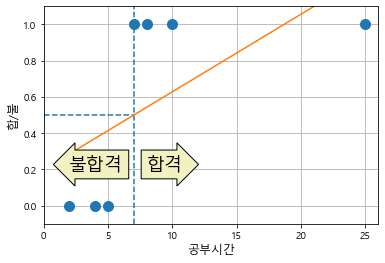

In [12]:
# 자격증 시험 결과
x = np.array([2, 4, 5, 7, 8, 10, 25]) # 공부 시간
y = np.array([0, 0, 0, 1, 1, 1, 1]) # 합격 / 불합격
plt.plot(x, y, marker='o', ls='none', ms=10)
plt.axvline(7, ls='--')
plt.axhline(.5, xmax=.27, ls='--')
plt.text(2, .2, '불합격', fontsize=18,
          bbox=dict(boxstyle='larrow', fc="#F1F1C1", ec="k"))
plt.text(8, .2, '합격', fontsize=18,
          bbox=dict(boxstyle='rarrow', fc="#F1F1C1", ec="k"))
plt.plot(x, x * 3 / 70 + .2)
plt.axis([0, 26, -.1, 1.1])
plt.xlabel('공부시간', fontsize=12)
plt.ylabel('합/불', fontsize=12)
plt.grid(True)

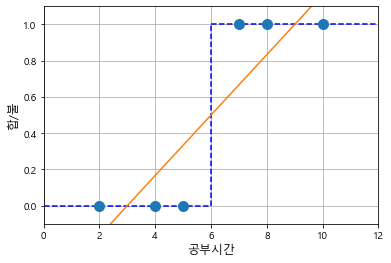

In [13]:
# 자격증 시험 결과
x = np.array([2, 4, 5, 7, 8, 10]) # 공부 시간
y = np.array([0, 0, 0, 1, 1, 1]) # 합격 / 불합격
plt.plot(x, y, marker='o', ls='none', ms=10)
plt.vlines(6, ymin=0., ymax=1., ls='--', color='b')
plt.hlines(0, xmin=0., xmax=6., ls='--', color='b')
plt.hlines(1, xmin=6., xmax=12., ls='--', color='b')
plt.plot(x, x / 6 - .5)
plt.axis([0, 12, -.1, 1.1])
plt.xlabel('공부시간', fontsize=12)
plt.ylabel('합/불', fontsize=12)
plt.grid(True)

- Linear Regrssion에선 아래의 hypothesis로 값을 예측.. 위와 같은 모습을 예측하려면 다른 Filter가 필요할 듯한데.. 어떻게 하지??
$$Linear\,Regression\;:\;H(x)=WX$$
$$\Downarrow$$
$$Logistic\,Regression\;:\;z=WX,\;G(z)=?$$
$$\uparrow$$
$$'sigmoid\;function'$$

## Sigmoid Function
$$G(z)=\frac{1}{1+e^{-z}},\quad where\;z=WX$$

- https://www.youtube.com/watch?v=mLth3-4yn4Q

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


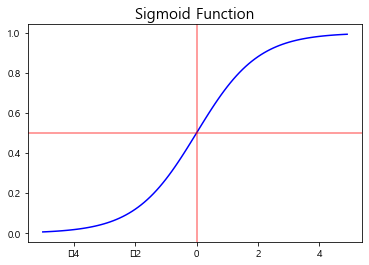

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.arange(-5, 5, .1)
plt.plot(z, sigmoid(z), color='b')
plt.axhline(.5, color='r', alpha=.5)
plt.axvline(.0, color='r', alpha=.5)
plt.title('Sigmoid Function', fontsize=15)
plt.show()

## Logistic Regression
$$cost(W)=\frac{1}{m}\sum_{i=1}^{m}(H(X)-y)^2\quad\leftarrow\quad H(X)=\frac{1}{1+e^{-XW}}$$
$$\downarrow$$
$$cost(W)=\frac{1}{m}\sum c(H(x),y),\quad where\;c(H(x),y)=\begin{cases}
-log(H(x)), & \mbox{if }\mbox{y=1} \\
-log(1-H(x)), & \mbox{if }\mbox{y=0}
\end{cases}$$
$$\Downarrow$$
$$c(H(x),y)=-{\color{Red}{y}}*log(H(x))-{\color{Red}{(1-y)}}*log(1-H(x))$$
$$cost(W)=-\frac{1}{m}\sum{\big(y*log(H(x))+(1-y)*log(1-H(x))\big)}$$

In [15]:
N = 1000
D = 5

X = 5 * np.random.randn(N, D)
w = np.random.randn(D, 1)
y = X.dot(w)

y[y <= 0] = 0
y[y > 0] = 1

X, y.flatten(), w

(array([[-2.10911067,  5.19629958, -5.07939248,  0.07180607,  3.38126873],
        [-7.40093608, -6.53301444,  7.80668847,  3.8931825 , -2.03369162],
        [-6.23863307,  1.78964831,  8.16350989,  4.36973257, -1.44523652],
        ...,
        [ 0.58787501, -0.76753646, -7.66703023,  2.8428725 , -7.31078109],
        [-0.55815669, -2.62635132,  0.25732406,  3.28610238, -4.30273292],
        [ 0.23930247, -0.45689669,  1.52064094, -4.92666599,  3.33797726]]),
 array([1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
        0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
        0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
   

In [16]:
X_train = X[1:100]
X_test = X[100:]

In [17]:
X.shape

(1000, 5)

In [18]:
X_train.shape, X_test.shape

((99, 5), (900, 5))

In [19]:
def dL_dw(X, e, a):
    return -X.T.dot(e * a * (1 - a)) / len(X)

def gradient_descent(gamma=5e-1, n_epochs=1000, batch_size=100, decay=.9):
    epoch_run = int(len(X) / batch_size)
    
    # get starting conditions
    w = np.random.randn(D, 1)
    params = []
    loss = np.zeros((n_epochs, 1))
    for i in range(n_epochs):
        params.append(w)
        for j in range(epoch_run):
            idx = np.random.choice(len(X), batch_size, replace=False)
            a = sigmoid(X[idx].dot(w)) # Activation function
            e = y[idx] - a # Really important that you use y_obs and not y
            # update parametes
            w = w - gamma * dL_dw(X[idx], e, a)
        loss[i] = .5 * e.T.dot(e) / len(e)
        gamma *= decay # decay is the learning parameter
        
    return params, loss

params, loss = gradient_descent()

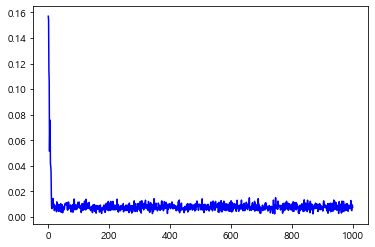

In [20]:
plt.plot(loss, color='b')

In [21]:
np.hstack((params[-1], w))

array([[-0.51690198, -0.8473436 ],
       [ 1.15433184,  1.81553045],
       [ 1.04093708,  1.69139954],
       [ 1.05926795,  1.68968141],
       [ 0.96560849,  1.54483517]])

In [22]:
idx = np.random.choice(len(X), 20, replace=False)
a = sigmoid(X[idx].dot(w)) # Activation function
e = y[idx] - a
.5 * e.T.dot(e) / len(e)

array([[0.01032081]])

In [23]:
# Classification error
X_test = 5 * np.random.randn(100, D)
y_test = X_test.dot(w)
y_test[y_test <= 0] = 0
y_test[y_test > 0] = 1

y_inferred = sigmoid(X_test.dot(params[-1])) # Get a probability measure given X
y_inferred[y_inferred > .5] = 1
y_inferred[y_inferred <= .5] = 0

np.sum(y_test == y_inferred)

99

## $\color{#330099}{\text{binary Cross Entropy Error}}$
We shall focus on doing the same as above with a different loss function, the Cross entrophy Loss function,
$$\mathcal{L}=-\frac{1}{N}\sum_{i}\big({{y_i}log(a_i)+(1-y_i)log(1-a_i)}\big)$$
The following remains the same:
$$\mathcal{z}_{i}=Wx_i$$
$$a_i=\sigma(\mathcal{z}_i)$$
and the derivative, (by **Chain Rule**,)
$$\frac{\partial\mathcal{L}}{\partial W}=
\sum_{i}{\frac{\partial\mathcal{L}}{\partial{a_i}}}
\frac{\partial{a_i}}{\partial\mathcal{z}_i}
\frac{\partial\mathcal{z}_i}{\partial W}$$
each value is,
$$\frac{\partial\mathcal{L}}{\partial{a_i}}=
-\frac{1}{N}\Big(\frac{y_i}{a_i}-\frac{1-y_i}{1-a_i}\Big),\;\frac{\partial{a_i}}{\partial\mathcal{z}_i}=
-\bigg(\frac{-e^{-z}}{(1+e^{-z})^2}\bigg),\;\frac{\partial\mathcal{z}_i}{\partial W}=x_i$$
Applying it to the formula,
$$\frac{\partial\mathcal{L}}{\partial{W}}=
\frac{1}{N}\sum_{i}-\bigg(\frac{y_i}{a_i}-\frac{1-y_i}{1-a_i}\bigg)\cdot\frac{e^{-z}}{(1+e^{-z})^2}\cdot{x_i}$$
Since $a_i=\frac{1}{1+e^{-z}}$,
$$a_i(1-a_i)=\frac{1}{1+e^{-z}}\cdot\frac{e^{-z}}{1+e^{-z}}=\frac{e^{-z}}{(1+e^{-z})^2}$$
Hence,
\begin{align}
\frac{\partial\mathcal{L}}{\partial{W}}
&=\frac{1}{N}\sum_{i}-\bigg(\frac{y_i-a_i}{a_i(1-a_i)}\bigg)\cdot a_i(1-a_i)\cdot{x_i}\\
&=\frac{1}{N}\sum_{i}-(y_i-a_i)\cdot{x_i}\\
\end{align}

## Partial Derivative of Logistic Regression's cost function(Bi-variate)
- pass

## keras 실습

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
import numpy as np

import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

x_data = np.array([[85, 1],
                   [4, 4],
                   [5, 3],
                   [7, 10],
                   [8, 7],
                   [10, 12]]) # 공부 시간
# x_data = np.array([2, 4, 5, 7, 8, 10])
y_data = np.array([0, 0, 0, 1, 1, 1]) # 합격 / 불합격

model = Sequential()
model.add(Dense(1, input_dim=2))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=sgd)

# prints summary of the model to the terminal
model.summary()

model.fit(x_data, y_data, epochs=200)

test_data = np.array([[5, 2]])
y_predict = model.predict(test_data)
y_predict2 = model.predict_classes(test_data)
print(np.where(y_predict>.5, 1, 0))
print(y_predict2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
6/6 [==============================] - 0s 27ms/sample - loss: 0.3611
Epoch 2/200
6/6 [==============================] - 0s 334us/sample - loss: 0.3579
Epoch 3/200
6/6 [==============================] - 0s 500us/sample - loss: 0.3551
Epoch 4/200
6/6 [==============================] - 0s 496us/sample - loss: 0.3528
Epoch 5/200
6/6 [==============================] - 0s 331us/sample - loss: 0.3508
Epoch 6/200
6/6 [==============================] - 0s 331us/sample - loss: 0.3492
Epoch 7/200
6/6 [==============================] - 0s

Epoch 93/200
6/6 [==============================] - 0s 331us/sample - loss: 0.3322
Epoch 94/200
6/6 [==============================] - 0s 413us/sample - loss: 0.3321
Epoch 95/200
6/6 [==============================] - 0s 579us/sample - loss: 0.3320
Epoch 96/200
6/6 [==============================] - 0s 413us/sample - loss: 0.3319
Epoch 97/200
6/6 [==============================] - 0s 331us/sample - loss: 0.3318
Epoch 98/200
6/6 [==============================] - 0s 331us/sample - loss: 0.3317
Epoch 99/200
6/6 [==============================] - 0s 413us/sample - loss: 0.3316
Epoch 100/200
6/6 [==============================] - 0s 331us/sample - loss: 0.3315
Epoch 101/200
6/6 [==============================] - 0s 331us/sample - loss: 0.3314
Epoch 102/200
6/6 [==============================] - 0s 331us/sample - loss: 0.3313
Epoch 103/200
6/6 [==============================] - 0s 413us/sample - loss: 0.3312
Epoch 104/200
6/6 [==============================] - 0s 496us/sample - loss: 0.3311

Epoch 191/200
6/6 [==============================] - 0s 413us/sample - loss: 0.3230
Epoch 192/200
6/6 [==============================] - 0s 413us/sample - loss: 0.3229
Epoch 193/200
6/6 [==============================] - 0s 413us/sample - loss: 0.3228
Epoch 194/200
6/6 [==============================] - 0s 331us/sample - loss: 0.3227
Epoch 195/200
6/6 [==============================] - 0s 331us/sample - loss: 0.3226
Epoch 196/200
6/6 [==============================] - 0s 413us/sample - loss: 0.3226
Epoch 197/200
6/6 [==============================] - 0s 413us/sample - loss: 0.3225
Epoch 198/200
6/6 [==============================] - 0s 331us/sample - loss: 0.3224
Epoch 199/200
6/6 [==============================] - 0s 413us/sample - loss: 0.3223
Epoch 200/200
6/6 [==============================] - 0s 331us/sample - loss: 0.3222
[[0]]
[[0]]


# Chapter 3. Softmax Classifier
- Multinomial Classification
- 어렵게 생각하지 말고, 이진 분류기들의 모둠으로 생각할 수 있다.

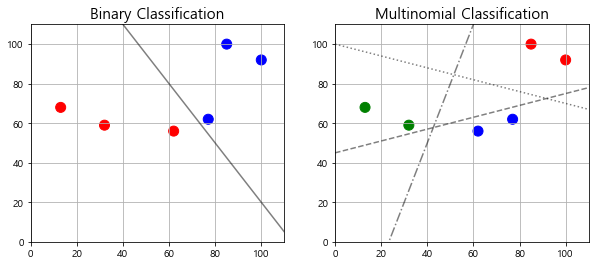

In [25]:
# Generate Data
import matplotlib

x = np.array([[85, 100],
              [100, 92],
              [77, 62],
              [62, 56],
              [32, 59],
              [13, 68]])
y = np.array([1,1,1,0,0,0])
y2 = np.array([0,0,1,1,2,2])

colors = ['red','blue','green']
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.scatter(x[:, 0], x[:, 1], c=y, s=100,
           cmap=matplotlib.colors.ListedColormap(colors[:2]))
ax1.plot(np.linspace(0, 110, 10), 
         np.linspace(0, 110, 10) * -1.5 + 170,
         color='k', alpha=.5)
ax1.axis([0, 110, 0, 110])
ax1.grid(True)
ax1.set_title('Binary Classification', fontsize=15)
ax2.scatter(x[:, 0], x[:, 1], c=y2, s=100, 
           cmap=matplotlib.colors.ListedColormap(colors[:3]))
ax2.plot(np.linspace(0, 110, 10), 
         np.linspace(0, 110, 10) * .3 + 45,
         color='k', alpha=.5, ls='--')
ax2.plot(np.linspace(0, 110, 10), 
         np.linspace(0, 110, 10) * 3 - 70,
         color='k', alpha=.5, ls='-.')
ax2.plot(np.linspace(0, 110, 10), 
         np.linspace(0, 110, 10) * -.3 + 100,
         color='k', alpha=.5, ls=':')
ax2.axis([0, 110, 0, 110])
ax2.grid(True)
ax2.set_title('Multinomial Classification', fontsize=15)
plt.show()

## $\text{Softmax; Hypothesis}$
각각의 클래스별 이진 분류기라고 생각해보자. sigmoid에 넣기 전 score를 구하는 것은 matrix를 이용하여 다음과 같이 계산할 수 있다.
$$z_{A}=\begin{bmatrix}x_1 & x_2\end{bmatrix}\begin{bmatrix}w_{A1}\\w_{A2}\end{bmatrix}
=\begin{bmatrix}x_1w_{A1}+x_2w_{A2}\end{bmatrix}$$
$$z_{B}=\begin{bmatrix}x_1 & x_2\end{bmatrix}\begin{bmatrix}w_{B1}\\w_{B2}\end{bmatrix}
=\begin{bmatrix}x_1w_{B1}+x_2w_{B2}\end{bmatrix}$$
$$z_{C}=\begin{bmatrix}x_1 & x_2\end{bmatrix}\begin{bmatrix}w_{C1}\\w_{C2}\end{bmatrix}
=\begin{bmatrix}x_1w_{C1}+x_2w_{C2}\end{bmatrix}$$
이를 행렬식으로 합쳐서 써주면 다음과 같다.
$$WX=\begin{bmatrix}
W_AX\\W_BX\\W_CX
\end{bmatrix}=
\begin{bmatrix}
W_A\\W_B\\W_C\\
\end{bmatrix}X
=\begin{bmatrix}
w_{A1}&w_{A2}\\
w_{B1}&w_{B2}\\
w_{C1}&w_{C2}\\
\end{bmatrix}
\begin{bmatrix}x_1\\x_2\end{bmatrix}
=\begin{bmatrix}
w_{A1x_1}+w_{A2}x_2\\
w_{B1}x_1+w_{B2}x_2\\
w_{C1}x_1+w_{C2}x_2\\
\end{bmatrix}
=\begin{bmatrix}
z_A\\z_B\\z_C
\end{bmatrix}$$
각각의 score에 sigmoid함수를 써서 계산하면 각 개별 class에서는 합이 1인 확률의 모습을 보여주지만 세 결과를 합쳤을 때 합이 1이 넘어갈 수 있으므로 확률로써 사용하기에는 무리가 있다. 때문에 결과의 합으로 각 결과를 나눠주므로써 값을 정규화시켜 확률로써 사용할 수 있도록 조정해준다.
$$\begin{align}
H_A(X)=\frac{1}{1+e^{-z_A}}=\hat{y}_A\\
H_B(X)=\frac{1}{1+e^{-z_B}}=\hat{y}_B\\
H_C(X)=\frac{1}{1+e^{-z_C}}=\hat{y}_C\\
\end{align}\;\Rightarrow\;for\;each\;i\in\{A,\,B,\,C\},\quad s(z_i)=\frac{e^{z_i}}{\sum_{j\in\{A,B,C\}}e^{z_j}}$$
각 score $z_j$는 $W_iX$와 같기 때문에 다음과 같이 $softmax$의 가설 함수를 정의할 수 있다.
$$for\;each\;i\in\{A,\,B,\,C\},\quad H(X)=\frac{e^{W_iX}}{\sum_{j\in\{A,B,C\}}e^{W_jX}}$$

## $\text{Softmax; cost function}$
$D(H,y)$ : 한 개의 instance의 score를 계산, $cost(W)$ : instance들의 score의 산술평균
$$D(H,y)=-\sum_{i=1}^{k}y_ilog(H_i(X)),\quad cost(W)=\frac{1}{m}\sum_{j=1}^{m}D(H,y)$$
$cost(W)$에 $D(H,y)$ 식을 대입하여 다시 정리하면,
$$cost(W)=-\frac{1}{m}\sum_{j=1}^{m}\sum_{i=1}^{k}y_ilog(H_i(X))$$
(정확하게 쓰자면 X에 j인덱스가 들어가야 하지 않나... 생각 중. 한번 수정해서 봅시다)

## keras 실습

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

x_data = np.array([[1, 2, 1, 1],
                   [2, 1, 3, 2],
                   [3, 1, 3, 4],
                   [4, 1, 5, 5],
                   [1, 7, 5, 5],
                   [1, 2, 5, 6],
                   [1, 6, 6, 6],
                   [1, 7, 7, 7]],
                  dtype=np.float32)

y_data = np.array([[0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1],
                   [0, 1, 0],
                   [0, 1, 0],
                   [0, 1, 0],
                   [1, 0, 0],
                   [1, 0, 0]],
                  dtype=np.float32)

model = Sequential()
model.add(Dense(3, input_shape=(4,)))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_data, y_data, epochs=1000)

print(model.predict_classes(np.array([[1, 2, 1, 1]])))
print(model.predict(np.array([[1, 2, 5, 6]])))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 3)                 15        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
8/8 [==============================] - 0s 10ms/sample - loss: 3.5039 - acc: 0.1250
Epoch 2/1000
8/8 [==============================] - 0s 310us/sample - loss: 3.4218 - acc: 0.1250
Epoch 3/1000
8/8 [==============================] - 0s 310us/sample - loss: 3.3466 - acc: 0.1250
Epoch 4/1000
8/8 [==============================] - 0s 253us/sample - loss: 3.2757 - acc: 0.1250
Epoch 5/1000
8/8 [==============================] - 0s 314us/sample - loss: 3.2077 - acc: 0.1250
Epoch 6/1000
8/8 [==============================] - 0s 310

Epoch 79/1000
8/8 [==============================] - 0s 248us/sample - loss: 1.0841 - acc: 0.3750
Epoch 80/1000
8/8 [==============================] - 0s 376us/sample - loss: 1.0762 - acc: 0.3750
Epoch 81/1000
8/8 [==============================] - 0s 310us/sample - loss: 1.0684 - acc: 0.3750
Epoch 82/1000
8/8 [==============================] - 0s 310us/sample - loss: 1.0609 - acc: 0.5000
Epoch 83/1000
8/8 [==============================] - 0s 248us/sample - loss: 1.0536 - acc: 0.5000
Epoch 84/1000
8/8 [==============================] - 0s 372us/sample - loss: 1.0465 - acc: 0.5000
Epoch 85/1000
8/8 [==============================] - 0s 310us/sample - loss: 1.0396 - acc: 0.5000
Epoch 86/1000
8/8 [==============================] - 0s 252us/sample - loss: 1.0328 - acc: 0.5000
Epoch 87/1000
8/8 [==============================] - 0s 310us/sample - loss: 1.0262 - acc: 0.5000
Epoch 88/1000
8/8 [==============================] - 0s 310us/sample - loss: 1.0199 - acc: 0.5000
Epoch 89/1000
8/8 [=

Epoch 162/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.8061 - acc: 0.6250
Epoch 163/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.8048 - acc: 0.6250
Epoch 164/1000
8/8 [==============================] - 0s 315us/sample - loss: 0.8036 - acc: 0.6250
Epoch 165/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.8024 - acc: 0.6250
Epoch 166/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.8012 - acc: 0.6250
Epoch 167/1000
8/8 [==============================] - 0s 314us/sample - loss: 0.8000 - acc: 0.6250
Epoch 168/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.7988 - acc: 0.6250
Epoch 169/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.7977 - acc: 0.6250
Epoch 170/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.7965 - acc: 0.6250
Epoch 171/1000
8/8 [==============================] - 0s 315us/sample - loss: 0.7954 - acc: 0.6250
Epoch 172/

Epoch 245/1000
8/8 [==============================] - 0s 252us/sample - loss: 0.7364 - acc: 0.8750
Epoch 246/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.7358 - acc: 0.8750
Epoch 247/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.7352 - acc: 0.8750
Epoch 248/1000
8/8 [==============================] - 0s 372us/sample - loss: 0.7346 - acc: 0.8750
Epoch 249/1000
8/8 [==============================] - 0s 372us/sample - loss: 0.7340 - acc: 0.8750
Epoch 250/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.7334 - acc: 0.8750
Epoch 251/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.7328 - acc: 0.8750
Epoch 252/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.7323 - acc: 0.8750
Epoch 253/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.7317 - acc: 0.8750
Epoch 254/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.7311 - acc: 0.8750
Epoch 255/

Epoch 328/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6948 - acc: 0.8750
Epoch 329/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.6943 - acc: 0.8750
Epoch 330/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6939 - acc: 0.8750
Epoch 331/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6935 - acc: 0.8750
Epoch 332/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6931 - acc: 0.8750
Epoch 333/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6926 - acc: 0.8750
Epoch 334/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6922 - acc: 0.8750
Epoch 335/1000
8/8 [==============================] - 0s 314us/sample - loss: 0.6918 - acc: 0.8750
Epoch 336/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6914 - acc: 0.8750
Epoch 337/1000
8/8 [==============================] - 0s 252us/sample - loss: 0.6910 - acc: 0.8750
Epoch 338/

Epoch 411/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.6632 - acc: 0.8750
Epoch 412/1000
8/8 [==============================] - 0s 315us/sample - loss: 0.6629 - acc: 0.8750
Epoch 413/1000
8/8 [==============================] - 0s 315us/sample - loss: 0.6626 - acc: 0.8750
Epoch 414/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.6622 - acc: 0.8750
Epoch 415/1000
8/8 [==============================] - 0s 315us/sample - loss: 0.6619 - acc: 0.8750
Epoch 416/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6616 - acc: 0.8750
Epoch 417/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6612 - acc: 0.8750
Epoch 418/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6609 - acc: 0.8750
Epoch 419/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6606 - acc: 0.8750
Epoch 420/1000
8/8 [==============================] - 0s 305us/sample - loss: 0.6602 - acc: 0.8750
Epoch 421/

Epoch 494/1000
8/8 [==============================] - 0s 252us/sample - loss: 0.6376 - acc: 0.8750
Epoch 495/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6373 - acc: 0.8750
Epoch 496/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.6371 - acc: 0.8750
Epoch 497/1000
8/8 [==============================] - 0s 315us/sample - loss: 0.6368 - acc: 0.8750
Epoch 498/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6365 - acc: 0.8750
Epoch 499/1000
8/8 [==============================] - 0s 252us/sample - loss: 0.6362 - acc: 0.8750
Epoch 500/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6359 - acc: 0.8750
Epoch 501/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6357 - acc: 0.8750
Epoch 502/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6354 - acc: 0.8750
Epoch 503/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6351 - acc: 0.8750
Epoch 504/

Epoch 577/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6161 - acc: 0.8750
Epoch 578/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6159 - acc: 0.8750
Epoch 579/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6156 - acc: 0.8750
Epoch 580/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6154 - acc: 0.8750
Epoch 581/1000
8/8 [==============================] - 0s 314us/sample - loss: 0.6151 - acc: 0.8750
Epoch 582/1000
8/8 [==============================] - 0s 314us/sample - loss: 0.6149 - acc: 0.8750
Epoch 583/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6147 - acc: 0.8750
Epoch 584/1000
8/8 [==============================] - 0s 306us/sample - loss: 0.6144 - acc: 0.8750
Epoch 585/1000
8/8 [==============================] - 0s 314us/sample - loss: 0.6142 - acc: 0.8750
Epoch 586/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.6140 - acc: 0.8750
Epoch 587/

Epoch 660/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5977 - acc: 0.8750
Epoch 661/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5974 - acc: 0.8750
Epoch 662/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5972 - acc: 0.8750
Epoch 663/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5970 - acc: 0.8750
Epoch 664/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5968 - acc: 0.8750
Epoch 665/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5966 - acc: 0.8750
Epoch 666/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5964 - acc: 0.8750
Epoch 667/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5962 - acc: 0.8750
Epoch 668/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5960 - acc: 0.8750
Epoch 669/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5958 - acc: 0.8750
Epoch 670/

Epoch 743/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5816 - acc: 0.8750
Epoch 744/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5814 - acc: 0.8750
Epoch 745/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5812 - acc: 0.8750
Epoch 746/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5811 - acc: 0.8750
Epoch 747/1000
8/8 [==============================] - 0s 372us/sample - loss: 0.5809 - acc: 0.8750
Epoch 748/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5807 - acc: 0.8750
Epoch 749/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5805 - acc: 0.8750
Epoch 750/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5803 - acc: 0.8750
Epoch 751/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5802 - acc: 0.8750
Epoch 752/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5800 - acc: 0.8750
Epoch 753/

Epoch 826/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5674 - acc: 0.8750
Epoch 827/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5673 - acc: 0.8750
Epoch 828/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5671 - acc: 0.8750
Epoch 829/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5670 - acc: 0.8750
Epoch 830/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5668 - acc: 0.8750
Epoch 831/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5666 - acc: 0.8750
Epoch 832/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5665 - acc: 0.8750
Epoch 833/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5663 - acc: 0.8750
Epoch 834/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5662 - acc: 0.8750
Epoch 835/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5660 - acc: 0.8750
Epoch 836/

Epoch 909/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5548 - acc: 0.8750
Epoch 910/1000
8/8 [==============================] - 0s 372us/sample - loss: 0.5547 - acc: 0.8750
Epoch 911/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5545 - acc: 0.8750
Epoch 912/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5544 - acc: 0.8750
Epoch 913/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5542 - acc: 0.8750
Epoch 914/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5541 - acc: 0.8750
Epoch 915/1000
8/8 [==============================] - 0s 186us/sample - loss: 0.5540 - acc: 0.8750
Epoch 916/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5538 - acc: 0.8750
Epoch 917/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5537 - acc: 0.8750
Epoch 918/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5535 - acc: 0.8750
Epoch 919/

Epoch 992/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5435 - acc: 0.8750
Epoch 993/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5433 - acc: 0.8750
Epoch 994/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5432 - acc: 0.8750
Epoch 995/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5431 - acc: 0.8750
Epoch 996/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5429 - acc: 0.8750
Epoch 997/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5428 - acc: 0.8750
Epoch 998/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5427 - acc: 0.8750
Epoch 999/1000
8/8 [==============================] - 0s 310us/sample - loss: 0.5426 - acc: 0.8750
Epoch 1000/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.5424 - acc: 0.8750
[2]
[[0.24362089 0.740131   0.01624808]]


In [27]:
import pandas as pd
x = np.array([[85, 100],
              [100, 92],
              [77, 62],
              [62, 56],
              [32, 59],
              [13, 68]])
y = np.array([0,0,1,1,2,2])
y = pd.get_dummies(y).values

model = Sequential()
model.add(Dense(12, input_shape=(2,)))
model.add(Activation('sigmoid'))
model.add(Dense(36))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])

model.fit(x, y, epochs=1000)
model.predict(x).argmax(axis=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                36        
_________________________________________________________________
activation_2 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 36)                468       
_________________________________________________________________
activation_3 (Activation)    (None, 36)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 111       
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 615
Trainable params: 615
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000

Epoch 74/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.5108 - acc: 1.0000
Epoch 75/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.5050 - acc: 1.0000
Epoch 76/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.4982 - acc: 1.0000
Epoch 77/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.4924 - acc: 1.0000
Epoch 78/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.4860 - acc: 1.0000
Epoch 79/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.4801 - acc: 1.0000
Epoch 80/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.4742 - acc: 1.0000
Epoch 81/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.4686 - acc: 1.0000
Epoch 82/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.4627 - acc: 1.0000
Epoch 83/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.4571 - acc: 1.0000
Epoch 84/1000
6/6 [=

Epoch 158/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.2147 - acc: 1.0000
Epoch 159/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.2128 - acc: 1.0000
Epoch 160/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.2109 - acc: 1.0000
Epoch 161/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.2093 - acc: 1.0000
Epoch 162/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.2070 - acc: 1.0000
Epoch 163/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.2053 - acc: 1.0000
Epoch 164/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.2031 - acc: 1.0000
Epoch 165/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.2014 - acc: 1.0000
Epoch 166/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.1995 - acc: 1.0000
Epoch 167/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.1976 - acc: 1.0000
Epoch 168/

Epoch 241/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.1025 - acc: 1.0000
Epoch 242/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.1016 - acc: 1.0000
Epoch 243/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.1008 - acc: 1.0000
Epoch 244/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0999 - acc: 1.0000
Epoch 245/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0989 - acc: 1.0000
Epoch 246/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0981 - acc: 1.0000
Epoch 247/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0973 - acc: 1.0000
Epoch 248/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0964 - acc: 1.0000
Epoch 249/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0956 - acc: 1.0000
Epoch 250/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0948 - acc: 1.0000
Epoch 251/

Epoch 324/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0507 - acc: 1.0000
Epoch 325/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0508 - acc: 1.0000
Epoch 326/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0514 - acc: 1.0000
Epoch 327/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0529 - acc: 1.0000
Epoch 328/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0529 - acc: 1.0000
Epoch 329/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0507 - acc: 1.0000
Epoch 330/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0491 - acc: 1.0000
Epoch 331/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0476 - acc: 1.0000
Epoch 332/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0469 - acc: 1.0000
Epoch 333/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0463 - acc: 1.0000
Epoch 334/

Epoch 407/1000
6/6 [==============================] - 0s 661us/sample - loss: 0.0243 - acc: 1.0000
Epoch 408/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0239 - acc: 1.0000
Epoch 409/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0236 - acc: 1.0000
Epoch 410/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0234 - acc: 1.0000
Epoch 411/1000
6/6 [==============================] - 0s 661us/sample - loss: 0.0232 - acc: 1.0000
Epoch 412/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0230 - acc: 1.0000
Epoch 413/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0229 - acc: 1.0000
Epoch 414/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0230 - acc: 1.0000
Epoch 415/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0232 - acc: 1.0000
Epoch 416/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0240 - acc: 1.0000
Epoch 417/

Epoch 490/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0110 - acc: 1.0000
Epoch 491/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0109 - acc: 1.0000
Epoch 492/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0108 - acc: 1.0000
Epoch 493/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0107 - acc: 1.0000
Epoch 494/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0106 - acc: 1.0000
Epoch 495/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0105 - acc: 1.0000
Epoch 496/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0104 - acc: 1.0000
Epoch 497/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0103 - acc: 1.0000
Epoch 498/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0102 - acc: 1.0000
Epoch 499/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0102 - acc: 1.0000
Epoch 500/

Epoch 573/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0061 - acc: 1.0000
Epoch 574/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0102 - acc: 1.0000
Epoch 575/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0114 - acc: 1.0000
Epoch 576/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0082 - acc: 1.0000
Epoch 577/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0049 - acc: 1.0000
Epoch 578/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.0046 - acc: 1.0000
Epoch 579/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0045 - acc: 1.0000
Epoch 580/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0045 - acc: 1.0000
Epoch 581/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0045 - acc: 1.0000
Epoch 582/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0044 - acc: 1.0000
Epoch 583/

Epoch 656/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0022 - acc: 1.0000
Epoch 657/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.0022 - acc: 1.0000
Epoch 658/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.0023 - acc: 1.0000
Epoch 659/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0033 - acc: 1.0000
Epoch 660/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0073 - acc: 1.0000
Epoch 661/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0064 - acc: 1.0000
Epoch 662/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0033 - acc: 1.0000
Epoch 663/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0020 - acc: 1.0000
Epoch 664/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0020 - acc: 1.0000
Epoch 665/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.0020 - acc: 1.0000
Epoch 666/

Epoch 739/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.0010 - acc: 1.0000
Epoch 740/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.0010 - acc: 1.0000
Epoch 741/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.0010 - acc: 1.0000
Epoch 742/1000
6/6 [==============================] - 0s 579us/sample - loss: 9.9185e-04 - acc: 1.0000
Epoch 743/1000
6/6 [==============================] - 0s 496us/sample - loss: 9.8196e-04 - acc: 1.0000
Epoch 744/1000
6/6 [==============================] - 0s 496us/sample - loss: 9.7184e-04 - acc: 1.0000
Epoch 745/1000
6/6 [==============================] - 0s 496us/sample - loss: 9.6148e-04 - acc: 1.0000
Epoch 746/1000
6/6 [==============================] - 0s 496us/sample - loss: 9.5099e-04 - acc: 1.0000
Epoch 747/1000
6/6 [==============================] - 0s 496us/sample - loss: 9.4025e-04 - acc: 1.0000
Epoch 748/1000
6/6 [==============================] - 0s 579us/sample - loss: 9.2935e

Epoch 820/1000
6/6 [==============================] - 0s 579us/sample - loss: 4.7858e-04 - acc: 1.0000
Epoch 821/1000
6/6 [==============================] - 0s 578us/sample - loss: 4.7401e-04 - acc: 1.0000
Epoch 822/1000
6/6 [==============================] - 0s 660us/sample - loss: 4.7174e-04 - acc: 1.0000
Epoch 823/1000
6/6 [==============================] - 0s 579us/sample - loss: 4.6971e-04 - acc: 1.0000
Epoch 824/1000
6/6 [==============================] - 0s 496us/sample - loss: 4.6761e-04 - acc: 1.0000
Epoch 825/1000
6/6 [==============================] - 0s 580us/sample - loss: 4.6541e-04 - acc: 1.0000
Epoch 826/1000
6/6 [==============================] - 0s 579us/sample - loss: 4.6315e-04 - acc: 1.0000
Epoch 827/1000
6/6 [==============================] - 0s 496us/sample - loss: 4.6077e-04 - acc: 1.0000
Epoch 828/1000
6/6 [==============================] - 0s 496us/sample - loss: 4.5874e-04 - acc: 1.0000
Epoch 829/1000
6/6 [==============================] - 0s 579us/sample - l

Epoch 900/1000
6/6 [==============================] - 0s 661us/sample - loss: 2.5584e-04 - acc: 1.0000
Epoch 901/1000
6/6 [==============================] - 0s 496us/sample - loss: 2.5381e-04 - acc: 1.0000
Epoch 902/1000
6/6 [==============================] - 0s 496us/sample - loss: 2.5175e-04 - acc: 1.0000
Epoch 903/1000
6/6 [==============================] - 0s 579us/sample - loss: 2.4963e-04 - acc: 1.0000
Epoch 904/1000
6/6 [==============================] - 0s 496us/sample - loss: 2.4742e-04 - acc: 1.0000
Epoch 905/1000
6/6 [==============================] - 0s 496us/sample - loss: 2.4518e-04 - acc: 1.0000
Epoch 906/1000
6/6 [==============================] - 0s 579us/sample - loss: 2.4294e-04 - acc: 1.0000
Epoch 907/1000
6/6 [==============================] - 0s 496us/sample - loss: 2.4125e-04 - acc: 1.0000
Epoch 908/1000
6/6 [==============================] - 0s 662us/sample - loss: 2.4082e-04 - acc: 1.0000
Epoch 909/1000
6/6 [==============================] - 0s 496us/sample - l

Epoch 980/1000
6/6 [==============================] - 0s 662us/sample - loss: 1.6234e-04 - acc: 1.0000
Epoch 981/1000
6/6 [==============================] - 0s 496us/sample - loss: 1.7849e-04 - acc: 1.0000
Epoch 982/1000
6/6 [==============================] - 0s 413us/sample - loss: 2.1212e-04 - acc: 1.0000
Epoch 983/1000
6/6 [==============================] - 0s 659us/sample - loss: 2.9707e-04 - acc: 1.0000
Epoch 984/1000
6/6 [==============================] - 0s 496us/sample - loss: 4.9223e-04 - acc: 1.0000
Epoch 985/1000
6/6 [==============================] - 0s 496us/sample - loss: 8.5117e-04 - acc: 1.0000
Epoch 986/1000
6/6 [==============================] - 0s 496us/sample - loss: 6.9581e-04 - acc: 1.0000
Epoch 987/1000
6/6 [==============================] - 0s 579us/sample - loss: 2.4053e-04 - acc: 1.0000
Epoch 988/1000
6/6 [==============================] - 0s 579us/sample - loss: 1.2469e-04 - acc: 1.0000
Epoch 989/1000
6/6 [==============================] - 0s 496us/sample - l

array([0, 0, 1, 1, 2, 2], dtype=int64)

## 왜 안될까?
- Data Normalization

In [28]:
import pandas as pd
x = np.array([[85, 100],
              [100, 92],
              [77, 62],
              [62, 56],
              [32, 59],
              [13, 68]])
# X minmax normalization
x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))
y = np.array([0,0,1,1,2,2])
# y one-hot encoding
y = pd.get_dummies(y).values

model = Sequential()
model.add(Dense(3, input_shape=(2,)))
model.add(Activation('softmax'))

model.summary()
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x, y, epochs=1000)
model.predict(x).argmax(axis=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
6/6 [==============================] - 0s 18ms/sample - loss: 1.1605 - acc: 0.5000
Epoch 2/1000
6/6 [==============================] - 0s 418us/sample - loss: 1.1589 - acc: 0.5000
Epoch 3/1000
6/6 [==============================] - 0s 413us/sample - loss: 1.1573 - acc: 0.5000
Epoch 4/1000
6/6 [==============================] - 0s 413us/sample - loss: 1.1557 - acc: 0.5000
Epoch 5/1000
6/6 [==============================] - 0s 413us/sample - loss: 1.1541 - acc: 0.5000
Epoch 6/1000
6/6 [==============================] - 0s 413us

Epoch 79/1000
6/6 [==============================] - 0s 420us/sample - loss: 1.0582 - acc: 0.5000
Epoch 80/1000
6/6 [==============================] - 0s 331us/sample - loss: 1.0571 - acc: 0.5000
Epoch 81/1000
6/6 [==============================] - 0s 419us/sample - loss: 1.0561 - acc: 0.5000
Epoch 82/1000
6/6 [==============================] - 0s 337us/sample - loss: 1.0550 - acc: 0.5000
Epoch 83/1000
6/6 [==============================] - 0s 414us/sample - loss: 1.0540 - acc: 0.5000
Epoch 84/1000
6/6 [==============================] - 0s 330us/sample - loss: 1.0529 - acc: 0.5000
Epoch 85/1000
6/6 [==============================] - 0s 413us/sample - loss: 1.0519 - acc: 0.5000
Epoch 86/1000
6/6 [==============================] - 0s 413us/sample - loss: 1.0509 - acc: 0.5000
Epoch 87/1000
6/6 [==============================] - 0s 331us/sample - loss: 1.0498 - acc: 0.5000
Epoch 88/1000
6/6 [==============================] - 0s 413us/sample - loss: 1.0488 - acc: 0.5000
Epoch 89/1000
6/6 [=

Epoch 162/1000
6/6 [==============================] - 0s 419us/sample - loss: 0.9840 - acc: 0.6667
Epoch 163/1000
6/6 [==============================] - 0s 499us/sample - loss: 0.9832 - acc: 0.6667
Epoch 164/1000
6/6 [==============================] - 0s 501us/sample - loss: 0.9825 - acc: 0.6667
Epoch 165/1000
6/6 [==============================] - 0s 331us/sample - loss: 0.9817 - acc: 0.6667
Epoch 166/1000
6/6 [==============================] - 0s 331us/sample - loss: 0.9810 - acc: 0.6667
Epoch 167/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.9802 - acc: 0.6667
Epoch 168/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.9795 - acc: 0.6667
Epoch 169/1000
6/6 [==============================] - 0s 336us/sample - loss: 0.9787 - acc: 0.6667
Epoch 170/1000
6/6 [==============================] - 0s 502us/sample - loss: 0.9780 - acc: 0.6667
Epoch 171/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.9773 - acc: 0.6667
Epoch 172/

Epoch 245/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.9287 - acc: 0.8333
Epoch 246/1000
6/6 [==============================] - 0s 330us/sample - loss: 0.9281 - acc: 0.8333
Epoch 247/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.9275 - acc: 0.8333
Epoch 248/1000
6/6 [==============================] - 0s 331us/sample - loss: 0.9269 - acc: 0.8333
Epoch 249/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.9263 - acc: 0.8333
Epoch 250/1000
6/6 [==============================] - 0s 331us/sample - loss: 0.9257 - acc: 0.8333
Epoch 251/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.9252 - acc: 0.8333
Epoch 252/1000
6/6 [==============================] - 0s 414us/sample - loss: 0.9246 - acc: 0.8333
Epoch 253/1000
6/6 [==============================] - 0s 416us/sample - loss: 0.9240 - acc: 0.8333
Epoch 254/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.9234 - acc: 0.8333
Epoch 255/

Epoch 328/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8834 - acc: 0.8333
Epoch 329/1000
6/6 [==============================] - 0s 419us/sample - loss: 0.8829 - acc: 0.8333
Epoch 330/1000
6/6 [==============================] - 0s 414us/sample - loss: 0.8824 - acc: 0.8333
Epoch 331/1000
6/6 [==============================] - 0s 331us/sample - loss: 0.8819 - acc: 0.8333
Epoch 332/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8814 - acc: 0.8333
Epoch 333/1000
6/6 [==============================] - 0s 335us/sample - loss: 0.8809 - acc: 0.8333
Epoch 334/1000
6/6 [==============================] - 0s 331us/sample - loss: 0.8804 - acc: 0.8333
Epoch 335/1000
6/6 [==============================] - 0s 330us/sample - loss: 0.8799 - acc: 0.8333
Epoch 336/1000
6/6 [==============================] - 0s 331us/sample - loss: 0.8794 - acc: 0.8333
Epoch 337/1000
6/6 [==============================] - 0s 330us/sample - loss: 0.8789 - acc: 0.8333
Epoch 338/

Epoch 411/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8440 - acc: 0.8333
Epoch 412/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.8435 - acc: 0.8333
Epoch 413/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.8431 - acc: 0.8333
Epoch 414/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.8426 - acc: 0.8333
Epoch 415/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8422 - acc: 0.8333
Epoch 416/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.8417 - acc: 0.8333
Epoch 417/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8413 - acc: 0.8333
Epoch 418/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8409 - acc: 0.8333
Epoch 419/1000
6/6 [==============================] - 0s 495us/sample - loss: 0.8404 - acc: 0.8333
Epoch 420/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8400 - acc: 0.8333
Epoch 421/

Epoch 494/1000
6/6 [==============================] - 0s 414us/sample - loss: 0.8084 - acc: 0.8333
Epoch 495/1000
6/6 [==============================] - 0s 414us/sample - loss: 0.8080 - acc: 0.8333
Epoch 496/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8076 - acc: 0.8333
Epoch 497/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8072 - acc: 0.8333
Epoch 498/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8068 - acc: 0.8333
Epoch 499/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8064 - acc: 0.8333
Epoch 500/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8060 - acc: 0.8333
Epoch 501/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8056 - acc: 0.8333
Epoch 502/1000
6/6 [==============================] - 0s 414us/sample - loss: 0.8052 - acc: 0.8333
Epoch 503/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.8048 - acc: 0.8333
Epoch 504/

Epoch 577/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.7759 - acc: 0.8333
Epoch 578/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7755 - acc: 0.8333
Epoch 579/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7751 - acc: 0.8333
Epoch 580/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.7747 - acc: 0.8333
Epoch 581/1000
6/6 [==============================] - 0s 414us/sample - loss: 0.7744 - acc: 0.8333
Epoch 582/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7740 - acc: 0.8333
Epoch 583/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.7736 - acc: 0.8333
Epoch 584/1000
6/6 [==============================] - 0s 579us/sample - loss: 0.7732 - acc: 0.8333
Epoch 585/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.7729 - acc: 0.8333
Epoch 586/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7725 - acc: 0.8333
Epoch 587/

Epoch 660/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.7458 - acc: 0.8333
Epoch 661/1000
6/6 [==============================] - 0s 330us/sample - loss: 0.7454 - acc: 0.8333
Epoch 662/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.7451 - acc: 0.8333
Epoch 663/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.7447 - acc: 0.8333
Epoch 664/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7444 - acc: 0.8333
Epoch 665/1000
6/6 [==============================] - 0s 330us/sample - loss: 0.7440 - acc: 0.8333
Epoch 666/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7437 - acc: 0.8333
Epoch 667/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7433 - acc: 0.8333
Epoch 668/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.7430 - acc: 0.8333
Epoch 669/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7426 - acc: 0.8333
Epoch 670/

Epoch 743/1000
6/6 [==============================] - 0s 414us/sample - loss: 0.7178 - acc: 0.8333
Epoch 744/1000
6/6 [==============================] - 0s 331us/sample - loss: 0.7175 - acc: 0.8333
Epoch 745/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7172 - acc: 0.8333
Epoch 746/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.7169 - acc: 0.8333
Epoch 747/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7165 - acc: 0.8333
Epoch 748/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7162 - acc: 0.8333
Epoch 749/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7159 - acc: 0.8333
Epoch 750/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7156 - acc: 0.8333
Epoch 751/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7152 - acc: 0.8333
Epoch 752/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.7149 - acc: 0.8333
Epoch 753/

Epoch 826/1000
6/6 [==============================] - 0s 330us/sample - loss: 0.6918 - acc: 0.8333
Epoch 827/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6915 - acc: 0.8333
Epoch 828/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.6912 - acc: 0.8333
Epoch 829/1000
6/6 [==============================] - 0s 330us/sample - loss: 0.6909 - acc: 0.8333
Epoch 830/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6906 - acc: 0.8333
Epoch 831/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6903 - acc: 0.8333
Epoch 832/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6900 - acc: 0.8333
Epoch 833/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.6897 - acc: 0.8333
Epoch 834/1000
6/6 [==============================] - 0s 414us/sample - loss: 0.6894 - acc: 0.8333
Epoch 835/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6891 - acc: 0.8333
Epoch 836/

Epoch 909/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.6676 - acc: 1.0000
Epoch 910/1000
6/6 [==============================] - 0s 495us/sample - loss: 0.6673 - acc: 1.0000
Epoch 911/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6670 - acc: 1.0000
Epoch 912/1000
6/6 [==============================] - 0s 331us/sample - loss: 0.6667 - acc: 1.0000
Epoch 913/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.6665 - acc: 1.0000
Epoch 914/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6662 - acc: 1.0000
Epoch 915/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6659 - acc: 1.0000
Epoch 916/1000
6/6 [==============================] - 0s 496us/sample - loss: 0.6656 - acc: 1.0000
Epoch 917/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6653 - acc: 1.0000
Epoch 918/1000
6/6 [==============================] - 0s 330us/sample - loss: 0.6650 - acc: 1.0000
Epoch 919/

Epoch 992/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6449 - acc: 1.0000
Epoch 993/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6447 - acc: 1.0000
Epoch 994/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6444 - acc: 1.0000
Epoch 995/1000
6/6 [==============================] - 0s 330us/sample - loss: 0.6441 - acc: 1.0000
Epoch 996/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6439 - acc: 1.0000
Epoch 997/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6436 - acc: 1.0000
Epoch 998/1000
6/6 [==============================] - 0s 413us/sample - loss: 0.6433 - acc: 1.0000
Epoch 999/1000
6/6 [==============================] - 0s 330us/sample - loss: 0.6431 - acc: 1.0000
Epoch 1000/1000
6/6 [==============================] - 0s 330us/sample - loss: 0.6428 - acc: 1.0000


array([0, 0, 1, 1, 2, 2], dtype=int64)

# Chapter 4. Keras 연습 데이터 실습

## Data Normalization

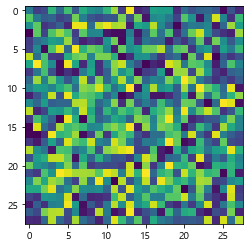

In [77]:
np.random.seed(777)
random_img = np.random.randint(0, 255, (28, 28))
plt.imshow(random_img)

In [80]:
print('기존의 max는 :', random_img.max())
print('기존의 min은 :', random_img.min())

new_max = 77
new_min = 55

print('새로운 max는 :',
    np.max((random_img - random_img.min(axis=0)) / (random_img.max(axis=0) - random_img.min(axis=0)) * (new_max - new_min) + new_min)
)
print('새로운 min은 :',
    np.min((random_img - random_img.min(axis=0)) / (random_img.max(axis=0) - random_img.min(axis=0)) * (new_max - new_min) + new_min)
)

기존의 max는 : 254
기존의 min은 : 0
새로운 max는 : 77.0
새로운 min은 : 55.0


In [81]:
(random_img - random_img.min(axis=0)) / (random_img.max(axis=0) - random_img.min(axis=0)) * (new_max - new_min) + new_min

array([[64.85217391, 58.92857143, 60.75384615, 69.1025641 , 62.392     ,
        69.76576577, 60.5       , 69.        , 65.57692308, 63.89777778,
        69.28571429, 74.63636364, 59.06722689, 76.62393162, 56.97014925,
        58.15537849, 68.08108108, 67.03418803, 67.0242915 , 57.85185185,
        62.85714286, 59.85585586, 61.51851852, 62.33333333, 61.11618257,
        55.17813765, 59.14349776, 57.13888889],
       [72.88695652, 63.81746032, 62.44615385, 61.20512821, 59.136     ,
        58.36936937, 72.23333333, 64.63636364, 59.33653846, 58.03111111,
        60.04761905, 60.90909091, 73.48739496, 58.76068376, 76.12437811,
        56.05179283, 65.5045045 , 65.81196581, 63.63967611, 59.78703704,
        71.15079365, 66.2972973 , 55.54320988, 63.70833333, 76.45228216,
        64.79757085, 56.28251121, 71.39814815],
       [67.24347826, 71.41269841, 58.38461538, 58.47863248, 61.6       ,
        55.        , 76.63333333, 77.        , 61.875     , 74.94666667,
        77.        , 75.    

In [86]:
np.array(
    [[[1,2,3],
      [5,6,7]],
     [[8,9,1],
      [3,5,7]]]
).sum(axis=0)

array([[ 9, 11,  4],
       [ 8, 11, 14]])

## 헷갈리는 개념들
- 손실 함수, 비용 함수, 목적 함수
    - 손실 함수(loss function) : 실제 값과 예측 값 간의 차이를 계산하기 위한 함수 (single data)
    - 비용 함수 (cost function) : 실제 값과 예측 값 간의 차이를 계산하기 위한 함수 (all? data)
    - 목적 함수 (objective function) : 최적화하기 위한 대상 함수를 의미하는 일반적인 용어
        - 오류를 최소화하거나 이익을 최대화하는 것들 모두 가능
- 클래스, 샘플, 레이블
    - 클래스(class) : 분류하고자 하는 문제의 카테고리
    - 샘플 (sample) : 각각의 개별 데이터를 지칭
    - 레이블 (label) : 특정 샘플의 클래스

## 알아야할 개념
- Batch
    - Disk <-> RAM <-> cpu
    - 하드는 tb단위지만 RAM은 그리 많이 나올 수 없음
    - image를 생각해보자!
        - 1080 * 1920 * 3(RGB) = 6MB
        - 이를 용량을 압축하여 쓰긴 하지만 일단 6MB라고 할 때,
        - imagenet의 데이터가 120만장
        - 7 TB...? 현실적으로 불가능한데..?
        - 우리의 RAM은 8GB거덩...
        - 그렇다면 어떻게 하는 것이 좋을까?
        - RAM이 허용할 수 있는 용량만큼만 가져와서 학습
        - 컴퓨터는 2의 지수꼴로 쓰면 메모리 효율이 좋음
        - 이 단위가 Batch!
- Epoch
    - 전체를 한번 돌리는 단위

## Boston House Pricing

In [87]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 설정함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

# 동일한 결과를 재현하기 위해서 random seed 고정
import numpy as np

np.random.seed(777)

# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

## 1. 데이터 준비

In [88]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 2us/step


In [90]:
train_data.shape, train_targets.shape, test_data.shape, test_targets.shape

((404, 13), (404,), (102, 13), (102,))

## 2. 데이터 전처리

In [95]:
# 데이터 정규화
train_mean = train_data.mean(axis=0)
train_std = train_data.std(axis=0)

# Standardization
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

In [107]:
train_targets, test_targets # randomize하게 분포

(array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
        17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
        32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
        23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
        12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
        22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
        15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
        14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
        14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
        28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
        19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
        18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
        31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
        19.6, 23.9, 24.5, 25. , 19.9, 

## 3. Base Line : 강사님의 layer 구축

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(1)) # 회귀 모델 (출력층에 활성화 함수 없음)
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

## 4. K-fold CV를 활용한 학습

In [112]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('>> fold ', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                         train_data[(i+1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                            train_targets[(i+1) * num_val_samples:]],
                                           axis=0)
    
    model = build_model()
    model.fit(partial_train_data, 
              partial_train_targets,
              epochs = num_epochs,
              batch_size = 1,
              verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

print('finished!!')

>> fold  0
>> fold  1
>> fold  2
>> fold  3
finished!!


In [113]:
print(all_scores)
mean = np.mean(all_scores)
stddev = np.std(all_scores)

print(u'%.2f \u00B1(%.2f)'%(mean, stddev))

[3.7313087, 2.897724, 3.31876, 4.3095603]
3.56 ±(0.52)


In [114]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('>> fold ', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                         train_data[(i+1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                            train_targets[(i+1) * num_val_samples:]],
                                           axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, 
                     partial_train_targets,
                     epochs = num_epochs,
                     batch_size = 1,
                     verbose = 0,
                     validation_data = (val_data, val_targets))
    
    mae_history = hist.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    
print('finished!!')

>> fold  0
>> fold  1
>> fold  2
>> fold  3
finished!!


In [119]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

print(average_mae_history)

[7.269361, 7.557172, 5.8480625, 6.2668886, 6.780044, 6.1393566, 6.464353, 8.542451, 5.3271976, 5.3844814, 5.4849215, 5.4009657, 4.405564, 5.5168552, 4.5003777, 4.558236, 4.8624887, 4.3876257, 4.1934843, 4.163751, 4.4347744, 3.9426317, 5.0542235, 4.1200027, 4.363756, 4.409502, 5.631084, 3.8548594, 4.0173807, 3.6084495, 3.969267, 4.2241, 3.8389175, 3.8815405, 3.9846847, 3.6309566, 3.8077474, 3.561737, 4.065186, 3.788883, 3.8201113, 3.721633, 3.9572551, 3.48836, 3.840106, 3.7658982, 3.679114, 3.296479, 3.5307412, 3.536701, 3.4988987, 3.2758024, 3.4853792, 3.3642373, 3.298008, 3.5154288, 3.9729779, 3.4003801, 3.6573086, 3.434591, 3.485385, 3.35561, 3.3618398, 3.858441, 3.228146, 3.5003579, 3.4062843, 3.3447886, 3.052794, 3.3918521, 3.1465454, 3.4513602, 3.1951985, 3.4125066, 3.3828237, 3.1610556, 3.50659, 3.014206, 4.0146933, 3.6131172, 3.399791, 3.1396933, 3.5871284, 3.164794, 3.1764324, 3.2369814, 3.187917, 2.9975374, 3.8555732, 3.164902, 3.188955, 3.2028394, 3.439104, 3.3065934, 3.50581

In [120]:
average_mae_history = []
for epoch in range(num_epochs):
    average_mae_per_epoch = []
    
    for mae_history in all_mae_histories: # 4개 fold 반복
        average_mae_per_epoch.append(mae_history[epoch])
    
    mean = np.mean(average_mae_per_epoch)
    average_mae_history.append(mean)

print(average_mae_history)

[7.269361, 7.557172, 5.8480625, 6.2668886, 6.780044, 6.1393566, 6.464353, 8.542451, 5.3271976, 5.3844814, 5.4849215, 5.4009657, 4.405564, 5.5168552, 4.5003777, 4.558236, 4.8624887, 4.3876257, 4.1934843, 4.163751, 4.4347744, 3.9426317, 5.0542235, 4.1200027, 4.363756, 4.409502, 5.631084, 3.8548594, 4.0173807, 3.6084495, 3.969267, 4.2241, 3.8389175, 3.8815405, 3.9846847, 3.6309566, 3.8077474, 3.561737, 4.065186, 3.788883, 3.8201113, 3.721633, 3.9572551, 3.48836, 3.840106, 3.7658982, 3.679114, 3.296479, 3.5307412, 3.536701, 3.4988987, 3.2758024, 3.4853792, 3.3642373, 3.298008, 3.5154288, 3.9729779, 3.4003801, 3.6573086, 3.434591, 3.485385, 3.35561, 3.3618398, 3.858441, 3.228146, 3.5003579, 3.4062843, 3.3447886, 3.052794, 3.3918521, 3.1465454, 3.4513602, 3.1951985, 3.4125066, 3.3828237, 3.1610556, 3.50659, 3.014206, 4.0146933, 3.6131172, 3.399791, 3.1396933, 3.5871284, 3.164794, 3.1764324, 3.2369814, 3.187917, 2.9975374, 3.8555732, 3.164902, 3.188955, 3.2028394, 3.439104, 3.3065934, 3.50581

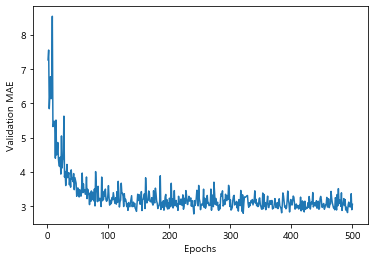

In [121]:
import matplotlib.pyplot as plt

# matplotlib이 Jupyter notebook 셀 안에서 생성되도록 함
# https://versusall.tistory.com/entry/Jupyter-Notebook-4-%EC%99%B8%EB%B6%80%EC%B0%BD%EC%97%90%EC%84%9C-%EA%B7%B8%EB%9E%98%ED%94%84-%EA%B7%B8%EB%A6%AC%EA%B8%B0-matplotlib-inline-qt-tk%C2%B6
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

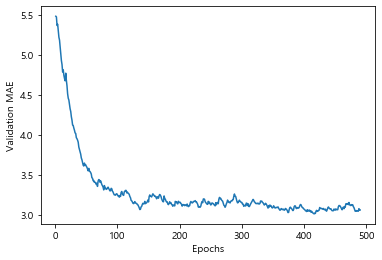

In [122]:
'''
시계열 신호에 지수 이동 평균(exponential moving averge) 필터링
'''
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            prev = smoothed_points[-1]
            smoothed_points.append(prev*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## 5. (과대적합 되기 전까지) 모델 학습

In [123]:
# 기존 model 객체를 사용하면 이어서 학습되므로, 새로운 model 객체를 생성함
model = build_model()
model.fit(train_data, 
          train_targets,
          epochs = 80,
          batch_size = 16,
          verbose = 1)

Epoch 1/80
404/404 [==============================] - 0s 565us/sample - loss: 352.1745 - mean_absolute_error: 12.1968
Epoch 2/80
404/404 [==============================] - 0s 160us/sample - loss: 96.6290 - mean_absolute_error: 7.6464
Epoch 3/80
404/404 [==============================] - 0s 159us/sample - loss: 115.2530 - mean_absolute_error: 8.3370
Epoch 4/80
404/404 [==============================] - 0s 155us/sample - loss: 121.9515 - mean_absolute_error: 8.3511
Epoch 5/80
404/404 [==============================] - 0s 161us/sample - loss: 97.4117 - mean_absolute_error: 7.5570
Epoch 6/80
404/404 [==============================] - 0s 163us/sample - loss: 92.6696 - mean_absolute_error: 7.1501
Epoch 7/80
404/404 [==============================] - 0s 158us/sample - loss: 91.7119 - mean_absolute_error: 7.5965
Epoch 8/80
404/404 [==============================] - 0s 153us/sample - loss: 91.6348 - mean_absolute_error: 7.2951
Epoch 9/80
404/404 [==============================] - 0s 156us/sampl

404/404 [==============================] - 0s 165us/sample - loss: 28.2637 - mean_absolute_error: 3.9117
Epoch 72/80
404/404 [==============================] - 0s 170us/sample - loss: 25.6877 - mean_absolute_error: 3.7451
Epoch 73/80
404/404 [==============================] - 0s 161us/sample - loss: 30.3888 - mean_absolute_error: 4.1722 - loss: 25.4882 - mean_absolute_error: 3.85
Epoch 74/80
404/404 [==============================] - 0s 166us/sample - loss: 23.1768 - mean_absolute_error: 3.5339
Epoch 75/80
404/404 [==============================] - 0s 156us/sample - loss: 25.7014 - mean_absolute_error: 3.7438 - loss: 24.8322 - mean_absolute_error: 3.66
Epoch 76/80
404/404 [==============================] - 0s 156us/sample - loss: 24.5560 - mean_absolute_error: 3.5684
Epoch 77/80
404/404 [==============================] - 0s 158us/sample - loss: 28.0983 - mean_absolute_error: 3.9213
Epoch 78/80
404/404 [==============================] - 0s 165us/sample - loss: 21.1780 - mean_absolute_er

## 6. 테스트셋으로 성능 평가하기

In [124]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print('test MSE score: %.3f', test_mse_score)
print('test MAE score: %.3f', test_mae_score)

102/102 [==============================] - 0s 952us/sample - loss: 77.4096 - mean_absolute_error: 7.6542
test MSE score: %.3f 77.4096347584444
test MAE score: %.3f 7.654172
